In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

For the most part we will be sticking to the process we followed in the group work; importing the data, splitting it into different arrays representing different states, and creating and comparing charts based on that data.

In [2]:
df = pd.read_csv("Data/ProjectDataStage1WIDEFORMAT.csv")

df.head(5)

Unnamed: 0  countyFIPS            County Name State  population  \
0           0           0  Statewide Unallocated    AL           0   
1           1        1001         Autauga County    AL       55869   
2           2        1003         Baldwin County    AL      223234   
3           3        1005         Barbour County    AL       24686   
4           4        1007            Bibb County    AL       22394   

   2020-01-22_Cases  2020-01-23_Cases  2020-01-24_Cases  2020-01-25_Cases  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   2020-01-26_Cases  ...  2023-07-14_Deaths  2023-07-15_Deaths  \
0                 0  ...                  0                  0   
1                 0  ...                235                235   
2                 0  ...                731                731   
3                 0  ...                104                104   
4                 0  ...                111                111   

   2023-07-16_Deaths  2023-07-17_Deaths  2023-07-18_Deaths  2023-07-19_Deaths  \
0                  0                  0                  0                  0   
1                235                235                235                235   
2                731                731                731                731   
3                104                104                104                104   
4                111                111                111                111   

   2023-07-20_Deaths  2023-07-21_Deaths  2023-07-22_Deaths  2023-07-23_Deaths  
0                  0                  0                  0                  0  
1                235                235                235                235  
2                731                731                731                731  
3                104                104                104                104  
4                111                111                111                111  

[5 rows x 2535 columns]

In [3]:
# This is code reused from the group section. It is dropping columns that don't contain data in our range between July 
# and December.
df2 = df.copy()

columns_to_drop = [col for col in df2.columns if (('2020-01-22' <= col < '2020-06-30') or ('2021-01-01' <= col)) and
                                                  (('Cases' in col) or ('Deaths' in col))]

df2.drop(columns=columns_to_drop, inplace=True)

df2.head(5)

Unnamed: 0  countyFIPS            County Name State  population  \
0           0           0  Statewide Unallocated    AL           0   
1           1        1001         Autauga County    AL       55869   
2           2        1003         Baldwin County    AL      223234   
3           3        1005         Barbour County    AL       24686   
4           4        1007            Bibb County    AL       22394   

   2020-06-30_Cases  2020-07-01_Cases  2020-07-02_Cases  2020-07-03_Cases  \
0                 0                 0                 0                 0   
1               537               553               561               568   
2               680               703               751               845   
3               325               326               335               348   
4               170               174               179               189   

   2020-07-04_Cases  ...  2020-12-22_Deaths  2020-12-23_Deaths  \
0                 0  ...                  0                  0   
1               591  ...                 44                 46   
2               863  ...                149                151   
3               350  ...                 32                 32   
4               190  ...                 42                 42   

   2020-12-24_Deaths  2020-12-25_Deaths  2020-12-26_Deaths  2020-12-27_Deaths  \
0                  0                  0                  0                  0   
1                 46                 46                 46                 47   
2                151                151                151                152   
3                 32                 32                 32                 32   
4                 42                 42                 42                 42   

   2020-12-28_Deaths  2020-12-29_Deaths  2020-12-30_Deaths  2020-12-31_Deaths  
0                  0                  0                  0                  0  
1                 47                 47                 48                 48  
2                152                156                160                161  
3                 32                 32                 32                 32  
4                 42                 42                 46                 46  

[5 rows x 375 columns]

# Generate weekly statistics (mean, median, mode) for number of cases and deaths across a specific "state".

We will save ourselves a lot of work by creating 5 dataframes that contain all the data for the states of interest to us.

In [4]:
# Define the list of states to filter
states_to_filter = ["NC", "GA", "MI", "NJ", "VA", "WI"]

# Initialize a dictionary to store the dataframes
state_dataframes = {}

for state in states_to_filter:
    state_df = df2[df2["State"] == state].copy()
    state_dataframes[f"df_{state}"] = state_df

# Taking a look at one of the dataframes to see if everything was handled fine by the function
state_dataframes["df_NC"].head()

Unnamed: 0  countyFIPS            County Name State  population  \
1925        1925           0  Statewide Unallocated    NC           0   
1926        1926       37001        Alamance County    NC      169509   
1927        1927       37003       Alexander County    NC       37497   
1928        1928       37005       Alleghany County    NC       11137   
1929        1929       37007           Anson County    NC       24446   

      2020-06-30_Cases  2020-07-01_Cases  2020-07-02_Cases  2020-07-03_Cases  \
1925                91                93               101               105   
1926                31                32                36                36   
1927               128               132               138               142   
1928                54                54                54                54   
1929                12                12                13                13   

      2020-07-04_Cases  ...  2020-12-22_Deaths  2020-12-23_Deaths  \
1925               112  ...                 26                 26   
1926                36  ...                  2                  2   
1927               148  ...                 19                 19   
1928                54  ...                 17                 17   
1929                14  ...                 15                 15   

      2020-12-24_Deaths  2020-12-25_Deaths  2020-12-26_Deaths  \
1925                 26                 26                 26   
1926                  2                  2                  2   
1927                 19                 19                 19   
1928                 17                 17                 17   
1929                 15                 15                 15   

      2020-12-27_Deaths  2020-12-28_Deaths  2020-12-29_Deaths  \
1925                 26                 29                 30   
1926                  2                  2                  2   
1927                 19                 23                 23   
1928                 17                 27                 27   
1929                 15                 15                 15   

      2020-12-30_Deaths  2020-12-31_Deaths  
1925                 30                 30  
1926                  2                  2  
1927                 26                 26  
1928                 27                 27  
1929                 15                 15  

[5 rows x 375 columns]

Now that we have a dataframe containing the data for 5 of the states, we should find their cumulative data and save that as an array. We should also save the cumulative population value as well because that will be useful in normalizing the data later.

In [5]:
def calculate_differences(arr):
    # Calculate differences between each element and its previous element
    differences = np.diff(arr)
    return differences

def process_dataframe(df):
    # Initialize arrays to store the sums
    cases_sum = np.array([])
    deaths_sum = np.array([])

    # Filter columns containing the substring "Cases" and "Deaths"
    cases_columns = [col for col in df.columns if "Cases" in col]
    deaths_columns = [col for col in df.columns if "Deaths" in col]

    # Calculate the sum of "Cases" and "Deaths" columns
    if cases_columns:
        cases_sum = df[cases_columns].sum().to_numpy()
        cases_sum = calculate_differences(cases_sum)
    if deaths_columns:
        deaths_sum = df[deaths_columns].sum().to_numpy()
        deaths_sum = calculate_differences(deaths_sum)

    # Calculate the sum of the "Population" column
    population_sum = df["population"].sum()

    return cases_sum, deaths_sum, population_sum

# create new dataframe names for the data ["NC", "GA", "MI", "NJ", "VA", "WI"]

df_nc = state_dataframes["df_NC"]
df_ga = state_dataframes["df_GA"]
df_mi = state_dataframes["df_MI"]
df_nj = state_dataframes["df_NJ"]
df_va = state_dataframes["df_VA"]
df_wi = state_dataframes["df_WI"]

df_nc

Unnamed: 0  countyFIPS            County Name State  population  \
1925        1925           0  Statewide Unallocated    NC           0   
1926        1926       37001        Alamance County    NC      169509   
1927        1927       37003       Alexander County    NC       37497   
1928        1928       37005       Alleghany County    NC       11137   
1929        1929       37007           Anson County    NC       24446   
...          ...         ...                    ...   ...         ...   
2021        2021       37191           Wayne County    NC      123131   
2022        2022       37193          Wilkes County    NC       68412   
2023        2023       37195          Wilson County    NC       81801   
2024        2024       37197          Yadkin County    NC       37667   
2025        2025       37199          Yancey County    NC       18069   

      2020-06-30_Cases  2020-07-01_Cases  2020-07-02_Cases  2020-07-03_Cases  \
1925                91                93               101               105   
1926                31                32                36                36   
1927               128               132               138               142   
1928                54                54                54                54   
1929                12                12                13                13   
...                ...               ...               ...               ...   
2021               714               726               745               757   
2022               332               334               334               338   
2023                43                43                43                44   
2024                 0                 0                 0                 0   
2025                 0                 0                 0                 0   

      2020-07-04_Cases  ...  2020-12-22_Deaths  2020-12-23_Deaths  \
1925               112  ...                 26                 26   
1926                36  ...                  2                  2   
1927               148  ...                 19                 19   
1928                54  ...                 17                 17   
1929                14  ...                 15                 15   
...                ...  ...                ...                ...   
2021               757  ...                100                100   
2022               340  ...                 24                 24   
2023                44  ...                  6                  6   
2024                 0  ...                  0                  0   
2025                 0  ...                  2                  2   

      2020-12-24_Deaths  2020-12-25_Deaths  2020-12-26_Deaths  \
1925                 26                 26                 26   
1926                  2                  2                  2   
1927                 19                 19                 19   
1928                 17                 17                 17   
1929                 15                 15                 15   
...                 ...                ...                ...   
2021                100                100                100   
2022                 24                 24                 24   
2023                  6                  6                  6   
2024                  0                  0                  0   
2025                  2                  2                  2   

      2020-12-27_Deaths  2020-12-28_Deaths  2020-12-29_Deaths  \
1925                 26                 29                 30   
1926                  2                  2                  2   
1927                 19                 23                 23   
1928                 17                 27                 27   
1929                 15                 15                 15   
...                 ...                ...                ...   
2021                100                103                103   
2022                 24               

Now we can call this function on our dataframes to get some arrays that contain relevant data.

In [6]:
nc_cases, nc_deaths, nc_pop  = process_dataframe(df_nc)
ga_cases, ga_deaths, ga_pop  = process_dataframe(df_ga)
mi_cases, mi_deaths, mi_pop  = process_dataframe(df_mi)
nj_cases, nj_deaths, nj_pop  = process_dataframe(df_nj)
va_cases, va_deaths, va_pop  = process_dataframe(df_va)
wi_cases, wi_deaths, wi_pop  = process_dataframe(df_wi)

To take a look at everything and make sure everything was copacetic I decided to print out our arrays and get a look at them.

In [7]:
nc_cases

array([ 1798,  1612,  2055,  1404,  1292,  1519,  1338,  1426,  2002,
        1949,  2438,  1887,  1792,  1935,  1737,  2127,  2014,  2441,
        1781,  1237,  1776,  2070,  1721,  2193,  2084,  1587,  1601,
        1699,  1713,  2321,  1907,  1689,  1320,  1276,  1596,  1106,
        1934,  1523,  1890,  1387,   597,  1023,     0,  2912,  1332,
        1510,  1218,   551,  1235,  1128,  1955,  1944,  1678,  1434,
        1227,  1345,  1223,  2034,  1401,  2535,  1025,  1069,  2084,
        1115,  1616,     1,  3527,  1070,   983,   710,   900,  1204,
        1483,  1431,  1163,   823,  1104,  1119,  1528,  1363,  1246,
        1268,   785,  1170,   930,  1649,  6097,  1697,  1263,   854,
         908,  1485,  2230,  1726,  2162,   609,  2191,  1522,  1680,
        2345,  2009,  2265,  1666,  1233,  1699,  1886,  2512,  2589,
        1992,  2269,  1154,  1569,  1815,  2362,  3237,     4,  1568,
        3727,     4,  2812,     5,  2747,  2025,  1305,  2140,  7245,
        2441,  2799,

In [8]:
nc_deaths

array([ 27,  17,  10,   7,   1,   2,  22,  20,  19,  17,  12,  15,   7,
        41,  14,   0,  40,  22,   5,   8,  25,  30,  28,  20,  32,   6,
         5,   0,  71,  40,  21,  40,   5,  13,  28,  41,  42,  42,  26,
         8,   4,  32,   0,  82,  26,  30,   4,   2,  48,  33,  34,  29,
        26,  10,   4,  33,  37,  24,  23,  30,   9,  10,  39,  38,  24,
         0,  85,   1,   7,  12,  48,  32,  33,  24,   5,   8,  51,  36,
        31,  29,  26,   3,   4,  40,  30,  40,  53,  31,   1,   4,  49,
        38,  46,  28,  21,   5,   0,  33,  23,  28,  26,  18,   5,   3,
        41,  38,  20,  32,  17,   4,   3,  49,   0,  89,   0, -89,   0,
       174,  -1,   0,   0,   0,   0,   0,   0, 276,  49,  42,   0,   0,
         0,  63,  24,  58,   0,  20,   0,   0,   0,   0, 179,   0,   0,
       107,   0,  34,   0,  99,   0,   0,   0,   0, 122,   0,   0, 142,
         0, 105,  26,   9,  45,  54,  55,  38,  43,  27,  30,  29,  98,
        82,  59,  64,  42,   0,   0,   0,   0,   0,   0,   0, 33

I was alarmed to see that these arrays contained negative values, which shouldn't be possible if the data was cumulative. This meant that either the data was wrong, or I had messed up somewhere with my calculations. So to check my work I created functions that will check if any of the dataframes have decreasing values.

In [9]:
def check_increasing_rows_cases(df):
    # Initialize variables to store the first violation
    violation_column = None
    violation_value = None

    # Filter columns containing "Cases"
    valid_columns = [col for col in df.columns if "Cases" in col]

    # Iterate over rows in the DataFrame
    for index, row in df.iterrows():
        previous_value = None
        for column in valid_columns:
            current_value = row[column]
            # Check if the current value is less than the previous value
            if previous_value is not None and current_value < previous_value:
                violation_column = column
                violation_value = row["County Name"]
                break  # Stop checking other columns on this row
            previous_value = current_value

    return violation_column, violation_value
def check_increasing_rows_deaths(df):
    # Initialize variables to store the first violation
    violation_column = None
    violation_value = None

    # Filter columns containing "Deaths"
    valid_columns = [col for col in df.columns if "Deaths" in col]

    # Iterate over rows in the DataFrame
    for index, row in df.iterrows():
        previous_value = None
        for column in valid_columns:
            current_value = row[column]
            # Check if the current value is less than the previous value
            if previous_value is not None and current_value < previous_value:
                violation_column = column
                violation_value = row["County Name"]
                break  # Stop checking other columns on this row
            previous_value = current_value

    return violation_column, violation_value

In [10]:
check_increasing_rows_cases(df_nc)

('2020-12-20_Cases', 'Yancey County')

In [11]:
row = df_nc.loc[df_nc['County Name'] == 'Yancey County']
first_value = row['2020-12-19_Cases'].values[0]
second_value = row['2020-12-20_Cases'].values[0]


print(first_value, second_value)

194 190


As you can see, between the days of December 19 and December 20, either a time traveler went back in time in Yancey County and undiagnosed 4 people with COVID, or we can assume that this dataset has errors. I'll do the same with the deaths data, and get the same result.

In [12]:
check_increasing_rows_deaths(df_nc)

('2020-10-01_Deaths', 'Yadkin County')

In [13]:
row = df_nc.loc[df_nc['County Name'] == 'Yadkin County']
first_value = row['2020-09-30_Deaths'].values[0]
second_value = row['2020-10-01_Deaths'].values[0]

print(first_value, second_value)

1 0


We can definitely assume no one has risen from the grave in Yadkin county, but we need to be able to assume this dataset is cumulative, so we will have to correct these negative differences by reducing them to 0. We can also remove the first element since technically June 30th is not in our date range, but we needed it before to calculate the difference for the first element of our array.

In [14]:
def fix_data(arr):
    # Check if the array is not empty
    if arr.size > 0:
        # Remove the first element by slicing the array from index 1 onwards
        arr = arr[1:]
        # Replace negative values with 0 using NumPy's np.maximum function
        arr = np.maximum(arr, 0)
    return arr

In [15]:
# List of states and data types
states = ['nc', 'va', 'ga', 'mi', 'nj']
data_types = ['cases', 'deaths']

# Loop through all combinations
for state in states:
    for data_type in data_types:
        array_name = f'{state}_{data_type}'
        array = globals().get(array_name)  # Get the array by name
        if array is not None:
            fixed_array = fix_data(array)
            # Assign the fixed array back to the global namespace
            globals()[array_name] = fixed_array

In [16]:
nc_cases

array([ 1612,  2055,  1404,  1292,  1519,  1338,  1426,  2002,  1949,
        2438,  1887,  1792,  1935,  1737,  2127,  2014,  2441,  1781,
        1237,  1776,  2070,  1721,  2193,  2084,  1587,  1601,  1699,
        1713,  2321,  1907,  1689,  1320,  1276,  1596,  1106,  1934,
        1523,  1890,  1387,   597,  1023,     0,  2912,  1332,  1510,
        1218,   551,  1235,  1128,  1955,  1944,  1678,  1434,  1227,
        1345,  1223,  2034,  1401,  2535,  1025,  1069,  2084,  1115,
        1616,     1,  3527,  1070,   983,   710,   900,  1204,  1483,
        1431,  1163,   823,  1104,  1119,  1528,  1363,  1246,  1268,
         785,  1170,   930,  1649,  6097,  1697,  1263,   854,   908,
        1485,  2230,  1726,  2162,   609,  2191,  1522,  1680,  2345,
        2009,  2265,  1666,  1233,  1699,  1886,  2512,  2589,  1992,
        2269,  1154,  1569,  1815,  2362,  3237,     4,  1568,  3727,
           4,  2812,     5,  2747,  2025,  1305,  2140,  7245,  2441,
        2799,  2643,

In [17]:
nc_deaths

array([ 17,  10,   7,   1,   2,  22,  20,  19,  17,  12,  15,   7,  41,
        14,   0,  40,  22,   5,   8,  25,  30,  28,  20,  32,   6,   5,
         0,  71,  40,  21,  40,   5,  13,  28,  41,  42,  42,  26,   8,
         4,  32,   0,  82,  26,  30,   4,   2,  48,  33,  34,  29,  26,
        10,   4,  33,  37,  24,  23,  30,   9,  10,  39,  38,  24,   0,
        85,   1,   7,  12,  48,  32,  33,  24,   5,   8,  51,  36,  31,
        29,  26,   3,   4,  40,  30,  40,  53,  31,   1,   4,  49,  38,
        46,  28,  21,   5,   0,  33,  23,  28,  26,  18,   5,   3,  41,
        38,  20,  32,  17,   4,   3,  49,   0,  89,   0,   0,   0, 174,
         0,   0,   0,   0,   0,   0,   0, 276,  49,  42,   0,   0,   0,
        63,  24,  58,   0,  20,   0,   0,   0,   0, 179,   0,   0, 107,
         0,  34,   0,  99,   0,   0,   0,   0, 122,   0,   0, 142,   0,
       105,  26,   9,  45,  54,  55,  38,  43,  27,  30,  29,  98,  82,
        59,  64,  42,   0,   0,   0,   0,   0,   0,   0, 334,  1

Now that this headache is dealt with, we can start generating things like mean, median, and mode. I will use Virginia as my first state that I will be analyzing in detail. While we're doing this, we can basically refactor our code from the group work to work for states instead.

In [18]:
def normalize_and_log(data_array, population):
    # Normalize by population (per 100,000)
    normalized_data = (data_array / population) * 100000
    
    # Log normalization (base 10)
    log_normalized_data = np.log10(normalized_data + 1)
    
    return log_normalized_data

def calculate_statistics(data_array):
    num_elements = data_array.shape[0]
    num_groups = num_elements // 7

    means = np.empty(num_groups)
    medians = np.empty(num_groups)
    modes = np.empty(num_groups)

    for i in range(num_groups):
        start_index = i * 7
        end_index = start_index + 7
        group_data = data_array[start_index:end_index]

        # Calculate mean
        means[i] = np.mean(group_data)

        # Calculate median
        medians[i] = np.median(group_data)

        # Calculate mode (using stats.mode)
        mode_result = stats.mode(group_data)
        modes[i] = mode_result.mode[0]

    return means, medians, modes

In [19]:
va_cases_means, va_cases_medians, va_cases_modes = calculate_statistics(normalize_and_log(va_cases, va_pop))
va_deaths_means, va_deaths_medians, va_deaths_modes = calculate_statistics(normalize_and_log(va_deaths, va_pop))
nc_cases_means, nc_cases_medians, nc_cases_modes = calculate_statistics(normalize_and_log(nc_cases, nc_pop))
nc_deaths_means, nc_deaths_medians, nc_deaths_modes = calculate_statistics(normalize_and_log(nc_deaths, nc_pop))
ga_cases_means, ga_cases_medians, ga_cases_modes = calculate_statistics(normalize_and_log(ga_cases, ga_pop))
ga_deaths_means, ga_deaths_medians, ga_deaths_modes = calculate_statistics(normalize_and_log(ga_deaths, ga_pop))
mi_cases_means, mi_cases_medians, mi_cases_modes = calculate_statistics(normalize_and_log(mi_cases, mi_pop))
mi_deaths_means, mi_deaths_medians, mi_deaths_modes = calculate_statistics(normalize_and_log(mi_deaths, mi_pop))
nj_cases_means, nj_cases_medians, nj_cases_modes = calculate_statistics(normalize_and_log(nj_cases, nj_pop))
nj_deaths_means, nj_deaths_medians, nj_deaths_modes = calculate_statistics(normalize_and_log(nj_deaths, nj_pop))
wi_cases_means, wi_cases_medians, wi_cases_modes = calculate_statistics(normalize_and_log(wi_cases, wi_pop))
wi_deaths_means, wi_deaths_medians, wi_deaths_modes = calculate_statistics(normalize_and_log(wi_deaths, wi_pop))

C:\Users\Billy\AppData\Local\Temp\ipykernel_21284\993933238.py:30: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(group_data)


In [20]:
# Refactored functions from the group work section

def display_state_cases(case_means, case_medians, case_modes, title):
    x = np.arange(len(case_means))

    plt.plot(x, case_means, label='Mean', marker='.', linestyle='-', color='blue')
    plt.plot(x, case_medians, label='Median', marker='.', linestyle='-', color='green')
    plt.plot(x, case_modes, label='Mode', marker='.', linestyle='-', color='yellow')

    
    plt.xlabel('Weeks')
    plt.ylabel('New Cases')
    plt.title(title)
    plt.legend()

    
    plt.grid(True)
    plt.show()
    
def display_state_deaths(deaths_means, deaths_medians, deaths_modes, title):
    x = np.arange(len(deaths_means))

    plt.plot(x, deaths_means, label='Mean', marker='.', linestyle='-', color='orange')
    plt.plot(x, deaths_medians, label='Median', marker='.', linestyle='-', color='black')
    plt.plot(x, deaths_modes, label='Mode', marker='.', linestyle='-', color='purple')

    plt.xlabel('Weeks')
    plt.ylabel('New Deaths')
    plt.title(title)
    plt.legend()

    plt.grid(True)
    plt.show()

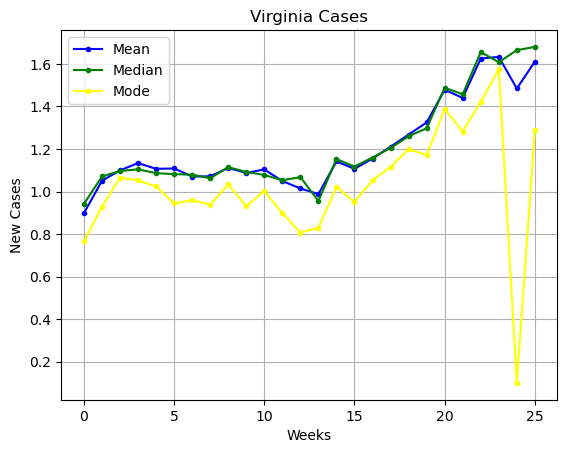

In [21]:
display_state_cases(va_cases_means, va_cases_medians, va_cases_modes, "Virginia Cases")

Virginia seems to have a small increase at week 1, but it may not be able to be called a peak, but rather a plateau, as the data stays almost stable for many weeks. However, the cases begin growing faster and faster until they hit their peak at around week 23.

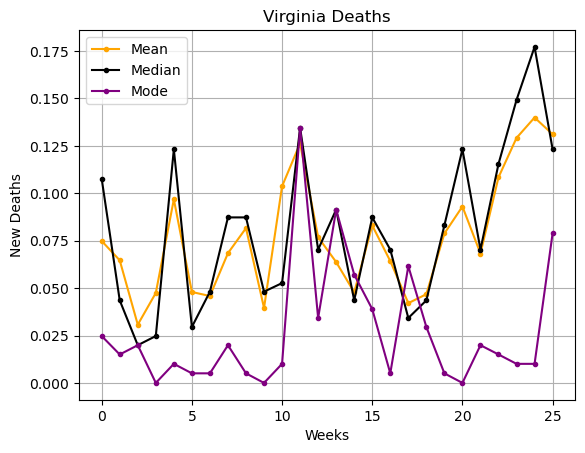

In [22]:
display_state_deaths(va_deaths_means, va_deaths_medians, va_deaths_modes, "Virginia Deaths")

These charts show the mean, median, and mode of Virginia cases and deaths over the weeks. They seem to show a zigzagging pattern, with a new peak every 4 weeks or so. There are peaks at week 0, week 4, week 8, week 11, week 13, week 15, week 20, and an absolute maximum, at least in terms of mean and median, at week 24.

# Compare the data against other states (compare against 5 states). Normalize by population, use a normalization factor which is able to identify cases and deaths, for example try per 10,000 or 100,000 (this depends on the population). Plot the values across the weeks in a line plot for the 5 states in a single graph. Describe why the rates differ across these states in the notebook. 

I've already normalized all the data, so this is a matter of generating the charts, and comparing them.

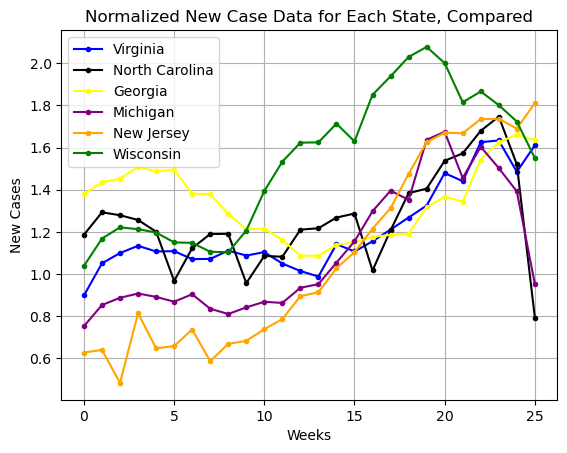

In [23]:
x = np.arange(len(va_cases_means))


plt.plot(x, va_cases_means, label='Virginia', marker='.', linestyle='-', color='blue')
plt.plot(x, nc_cases_means, label='North Carolina', marker='.', linestyle='-', color='black')
plt.plot(x, ga_cases_means, label='Georgia', marker='.', linestyle='-', color='yellow')
plt.plot(x, mi_cases_means, label='Michigan', marker='.', linestyle='-', color='purple')
plt.plot(x, nj_cases_means, label='New Jersey', marker='.', linestyle='-', color='orange')
plt.plot(x, wi_cases_means, label='Wisconsin', marker='.', linestyle='-', color='green')

    
plt.xlabel('Weeks')
plt.ylabel('New Cases')
plt.title('Normalized New Case Data for Each State, Compared')
plt.legend()

    
plt.grid(True)
plt.show()

The data from these states all tend to follow the same pattern. There is a general positive overall trend to the data and it vaguely matches the pattern of the USA overall. 

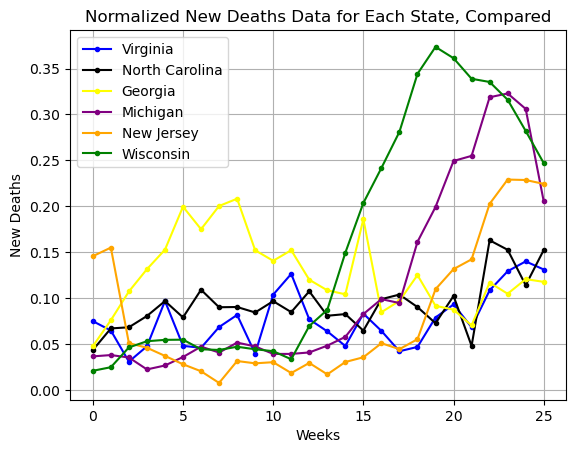

In [24]:
x = np.arange(len(va_cases_means))


plt.plot(x, va_deaths_means, label='Virginia', marker='.', linestyle='-', color='blue')
plt.plot(x, nc_deaths_means, label='North Carolina', marker='.', linestyle='-', color='black')
plt.plot(x, ga_deaths_means, label='Georgia', marker='.', linestyle='-', color='yellow')
plt.plot(x, mi_deaths_means, label='Michigan', marker='.', linestyle='-', color='purple')
plt.plot(x, nj_deaths_means, label='New Jersey', marker='.', linestyle='-', color='orange')
plt.plot(x, wi_deaths_means, label='Wisconsin', marker='.', linestyle='-', color='green')

    
plt.xlabel('Weeks')
plt.ylabel('New Deaths')
plt.title('Normalized New Deaths Data for Each State, Compared')
plt.legend()

    
plt.grid(True)
plt.show()

New Jersey's steady upward trend may be the result of their gradually relaxing restrictions over this time period.

Source:
https://covid19.nj.gov/faqs/nj-information/reopening-guidance-and-restrictions/has-new-jersey-lifted-restrictions

Virginia's upward trend over this period may also be explainable by the covid restrictions that were being relaxed around this time, such as resuming in-person public school classes.

Source:
https://www.nga.org/coronavirus-state-actions/virginia/

North Carolina's positive trend may be explained by a relaxation in COVID restrictions. In the attached article, they claimed that they had noticed cases had a downward trend and were perhaps too eager to begin easing restrictions.

https://governor.nc.gov/news/key-indicators-remain-stable-north-carolina-moves-safer-home-phase-2

Georgia was already experiencing outbreaks in nursing homes in the summer, and there were many viral news events such as the time students were suspended for posting a photo of a crowded school hall filled with unmasked students, that suggested that precautions such as staying masked and maintaining social distance were not a cultural priority in Georgia, leading to increase in outbreaks over time. However, by experiencing those early outbreaks, they may have built enough natural immunity to avoid the worst of the outbreaks in December.

Sources:
https://www.wdef.com/dalton-nursing-home-leads-latest-covid-19-outbreak-northwest-georgia/
https://www.buzzfeednews.com/article/laurenstrapagiel/north-paulding-high-school-suspensions-for-hallway-photos

Michigan stayed comparatively low in comparison to many other states, this may be because, while they attempted to ease restrictions around businesses and schools around the beginning of the summer, when cases began to pick up again Michigan leadership didn't hesitate to shut them back down.

Source:
https://www.fox2detroit.com/news/whitmer-administration-issues-new-restrictions-to-slow-spread-of-covid-19

New Jersey also started comparatively low, at least in number of cases, which indicates their restrictions such as a curfew in Hoboken and gathering restriction sizes were relatively successful, but perhaps not enough to avoid the fate the rest of the country faced in the last months of the year.

Sources:
https://www.nbcnewyork.com/news/coronavirus/hoboken-mayor-imposes-mandatory-nightly-curfew-limits-restaurant-access/2327250/

It was difficult for me to find a reason why Wisconsin may be the worst hit by COVID, as they didn't seem to have any glaring deficiencies in their response to the pandemic. However, Wisconsin does have an abnormally large percentage of people in their population at retirement age. Older people are more likely to scoff at mask mandates as well as die from the disease once it is contracted.

# Identify the peaks, do they compare with the US pattern?

The peaks do tend to line up with the trend around the country. While the US started with a peak of cases in week 1, you can see that peak in many of these states, in cases. While Wisconsin hit its case peak earlier and came down to meet the rest of these states, they all experienced a huge wave of new cases around December.

The deaths follow this same pattern. With an initial peak in the weeks following the beginning of the dataset, remaining relatively stable, until a big spike that is gathered around the beginning of December/end of November.

# Identify five counties within a state of your choice with high cases and death rates.

We already have a dataframe for each state. So we can write a function that will process and graph the elements of the 'df_va' dataframe.

In [25]:
df_va.head()

Unnamed: 0  countyFIPS            County Name State  population  \
2868        2868           0  Statewide Unallocated    VA           0   
2869        2869       51001        Accomack County    VA       32316   
2870        2870       51003       Albemarle County    VA      109330   
2871        2871       51005       Alleghany County    VA       14860   
2872        2872       51007          Amelia County    VA       13145   

      2020-06-30_Cases  2020-07-01_Cases  2020-07-02_Cases  2020-07-03_Cases  \
2868               401               407               412               420   
2869                31                33                33                34   
2870                44                44                44                45   
2871                36                36                36                37   
2872                40                40                41                43   

      2020-07-04_Cases  ...  2020-12-22_Deaths  2020-12-23_Deaths  \
2868               456  ...                 29                 29   
2869                35  ...                 20                 21   
2870                45  ...                  7                  7   
2871                37  ...                  8                  8   
2872                43  ...                  6                  7   

      2020-12-24_Deaths  2020-12-25_Deaths  2020-12-26_Deaths  \
2868                 29                 30                 30   
2869                 22                 22                 22   
2870                  7                  7                  7   
2871                  9                  9                  9   
2872                  7                  7                  7   

      2020-12-27_Deaths  2020-12-28_Deaths  2020-12-29_Deaths  \
2868                 31                 31                 31   
2869                 22                 22                 22   
2870                  7                  7                  7   
2871                  9                  9                 10   
2872                  7                  7                  7   

      2020-12-30_Deaths  2020-12-31_Deaths  
2868                 31                 31  
2869                 22                 22  
2870                  7                  7  
2871                 10                 10  
2872                  7                  7  

[5 rows x 375 columns]

C:\Users\Billy\AppData\Local\Temp\ipykernel_21284\993933238.py:3: RuntimeWarning: divide by zero encountered in divide
  normalized_data = (data_array / population) * 100000
C:\Users\Billy\AppData\Local\Temp\ipykernel_21284\993933238.py:30: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(group_data)


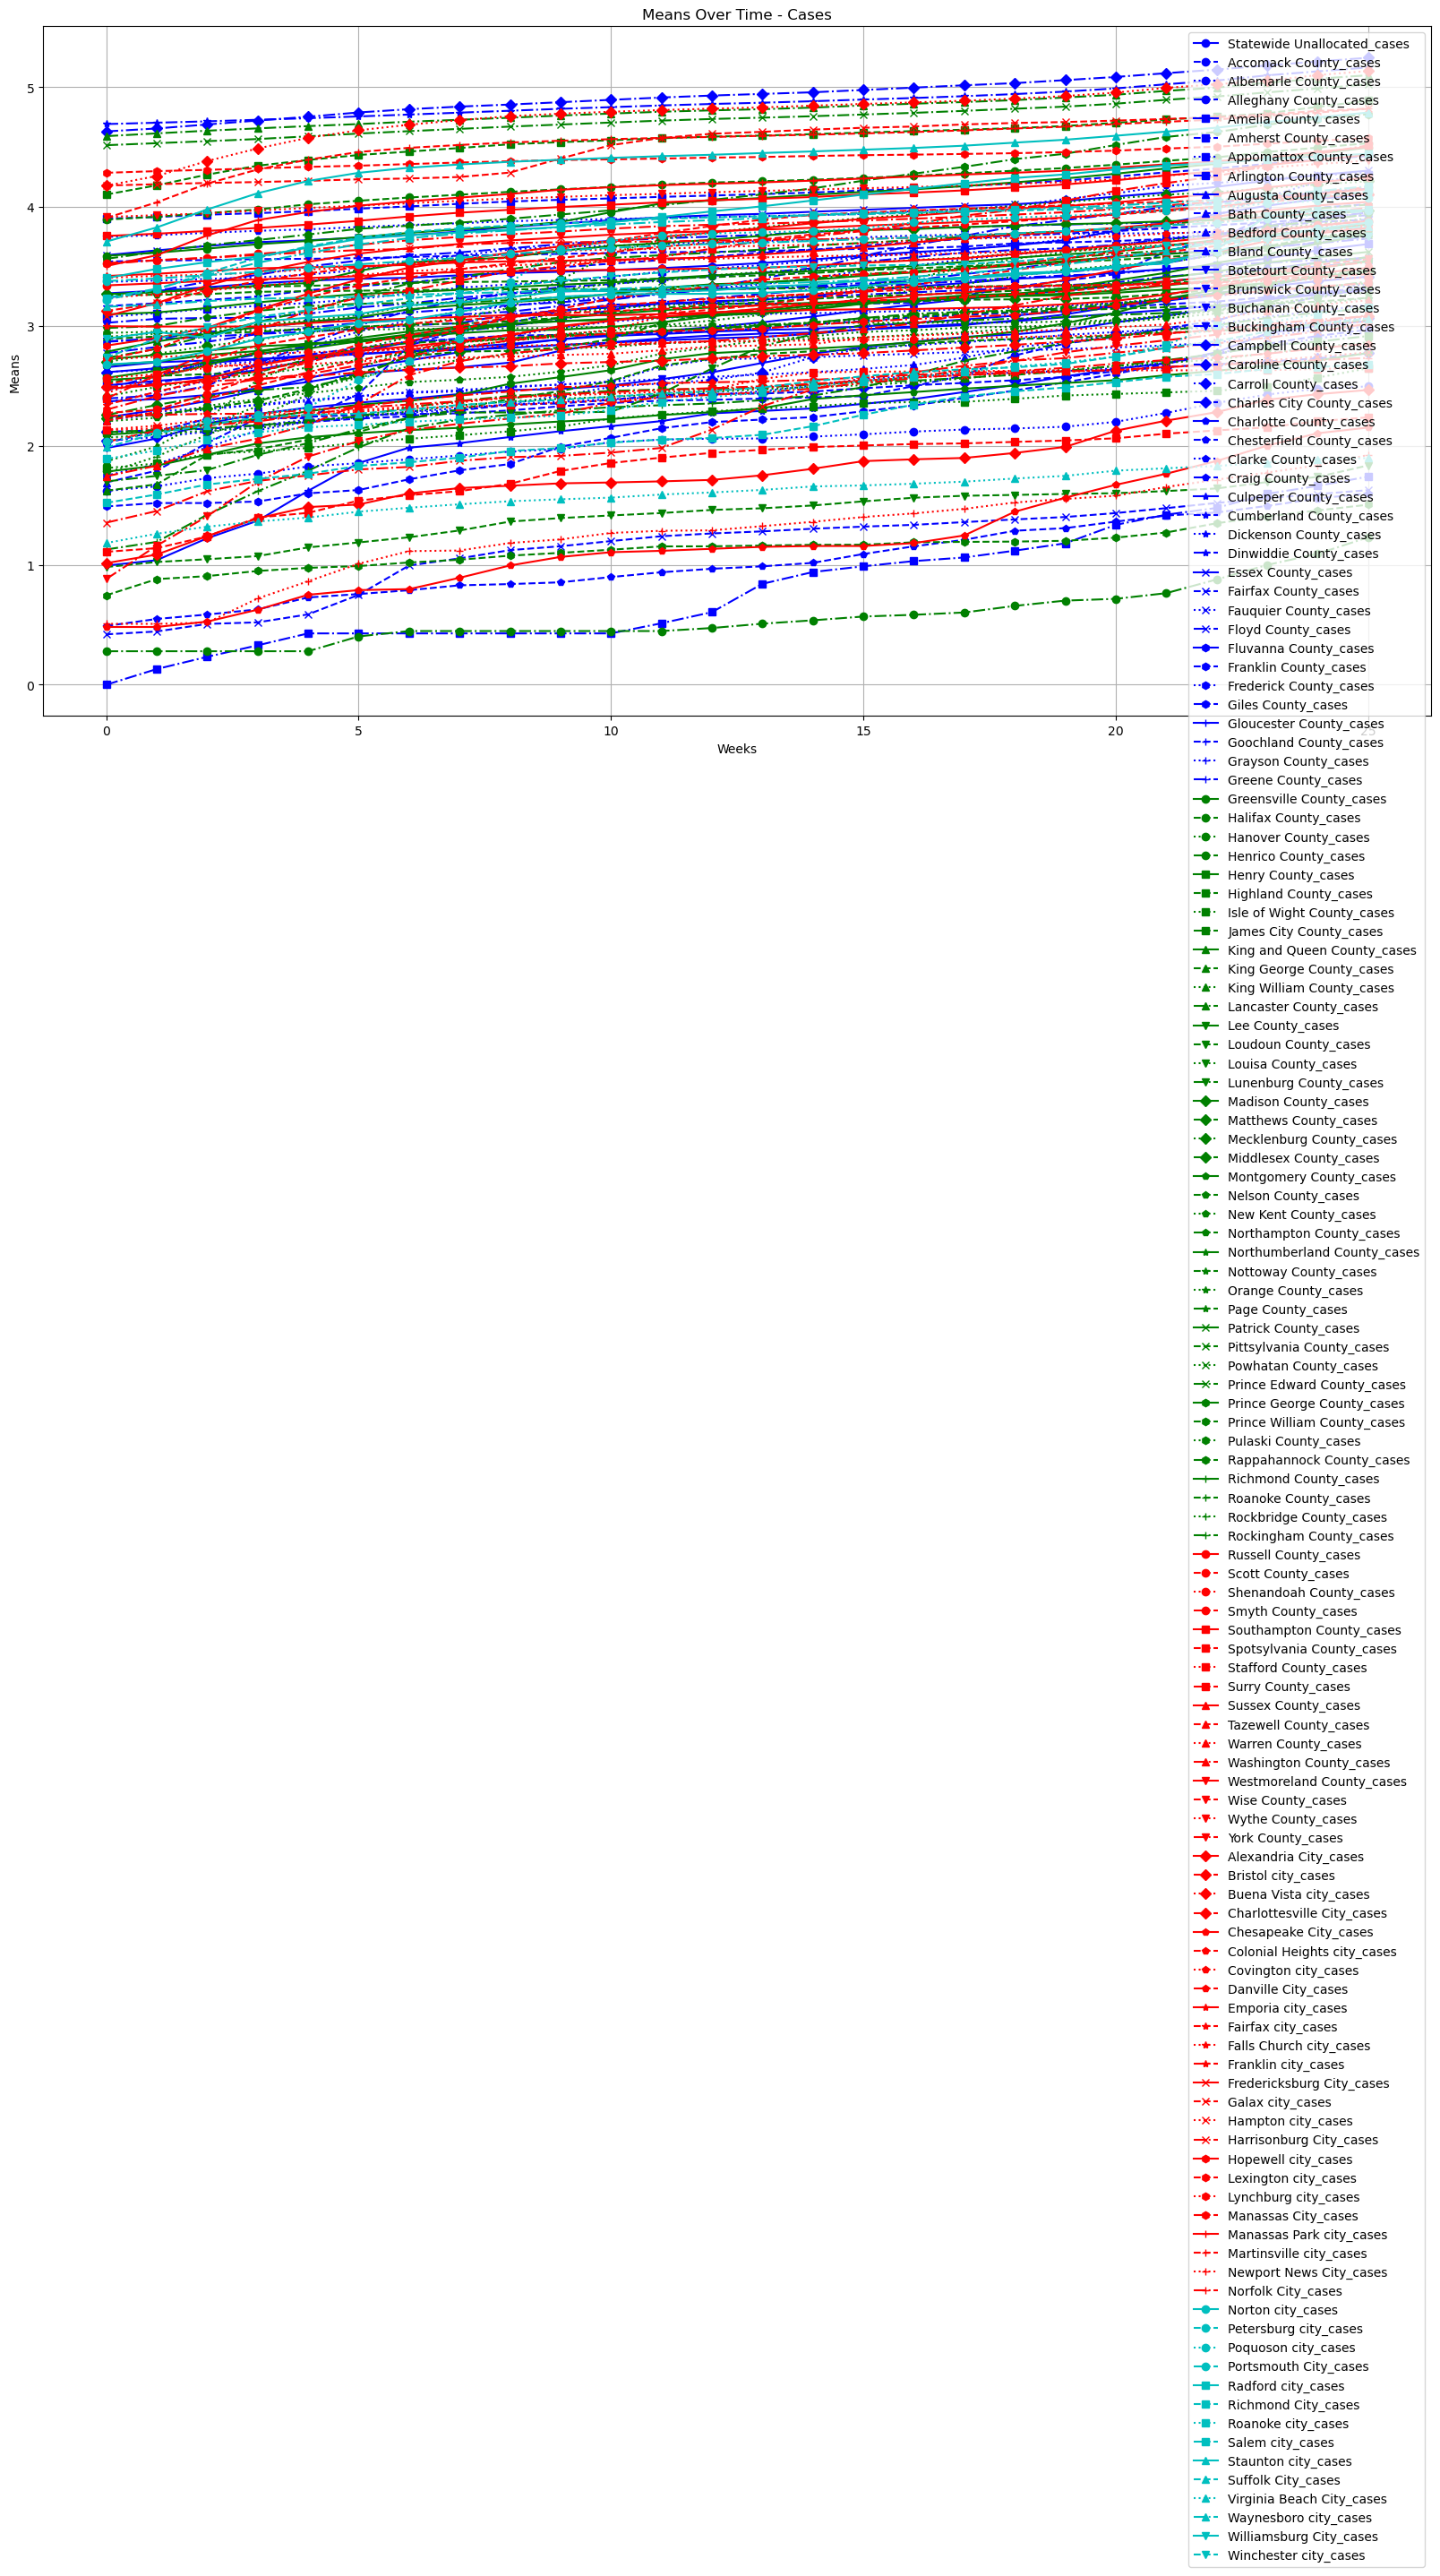

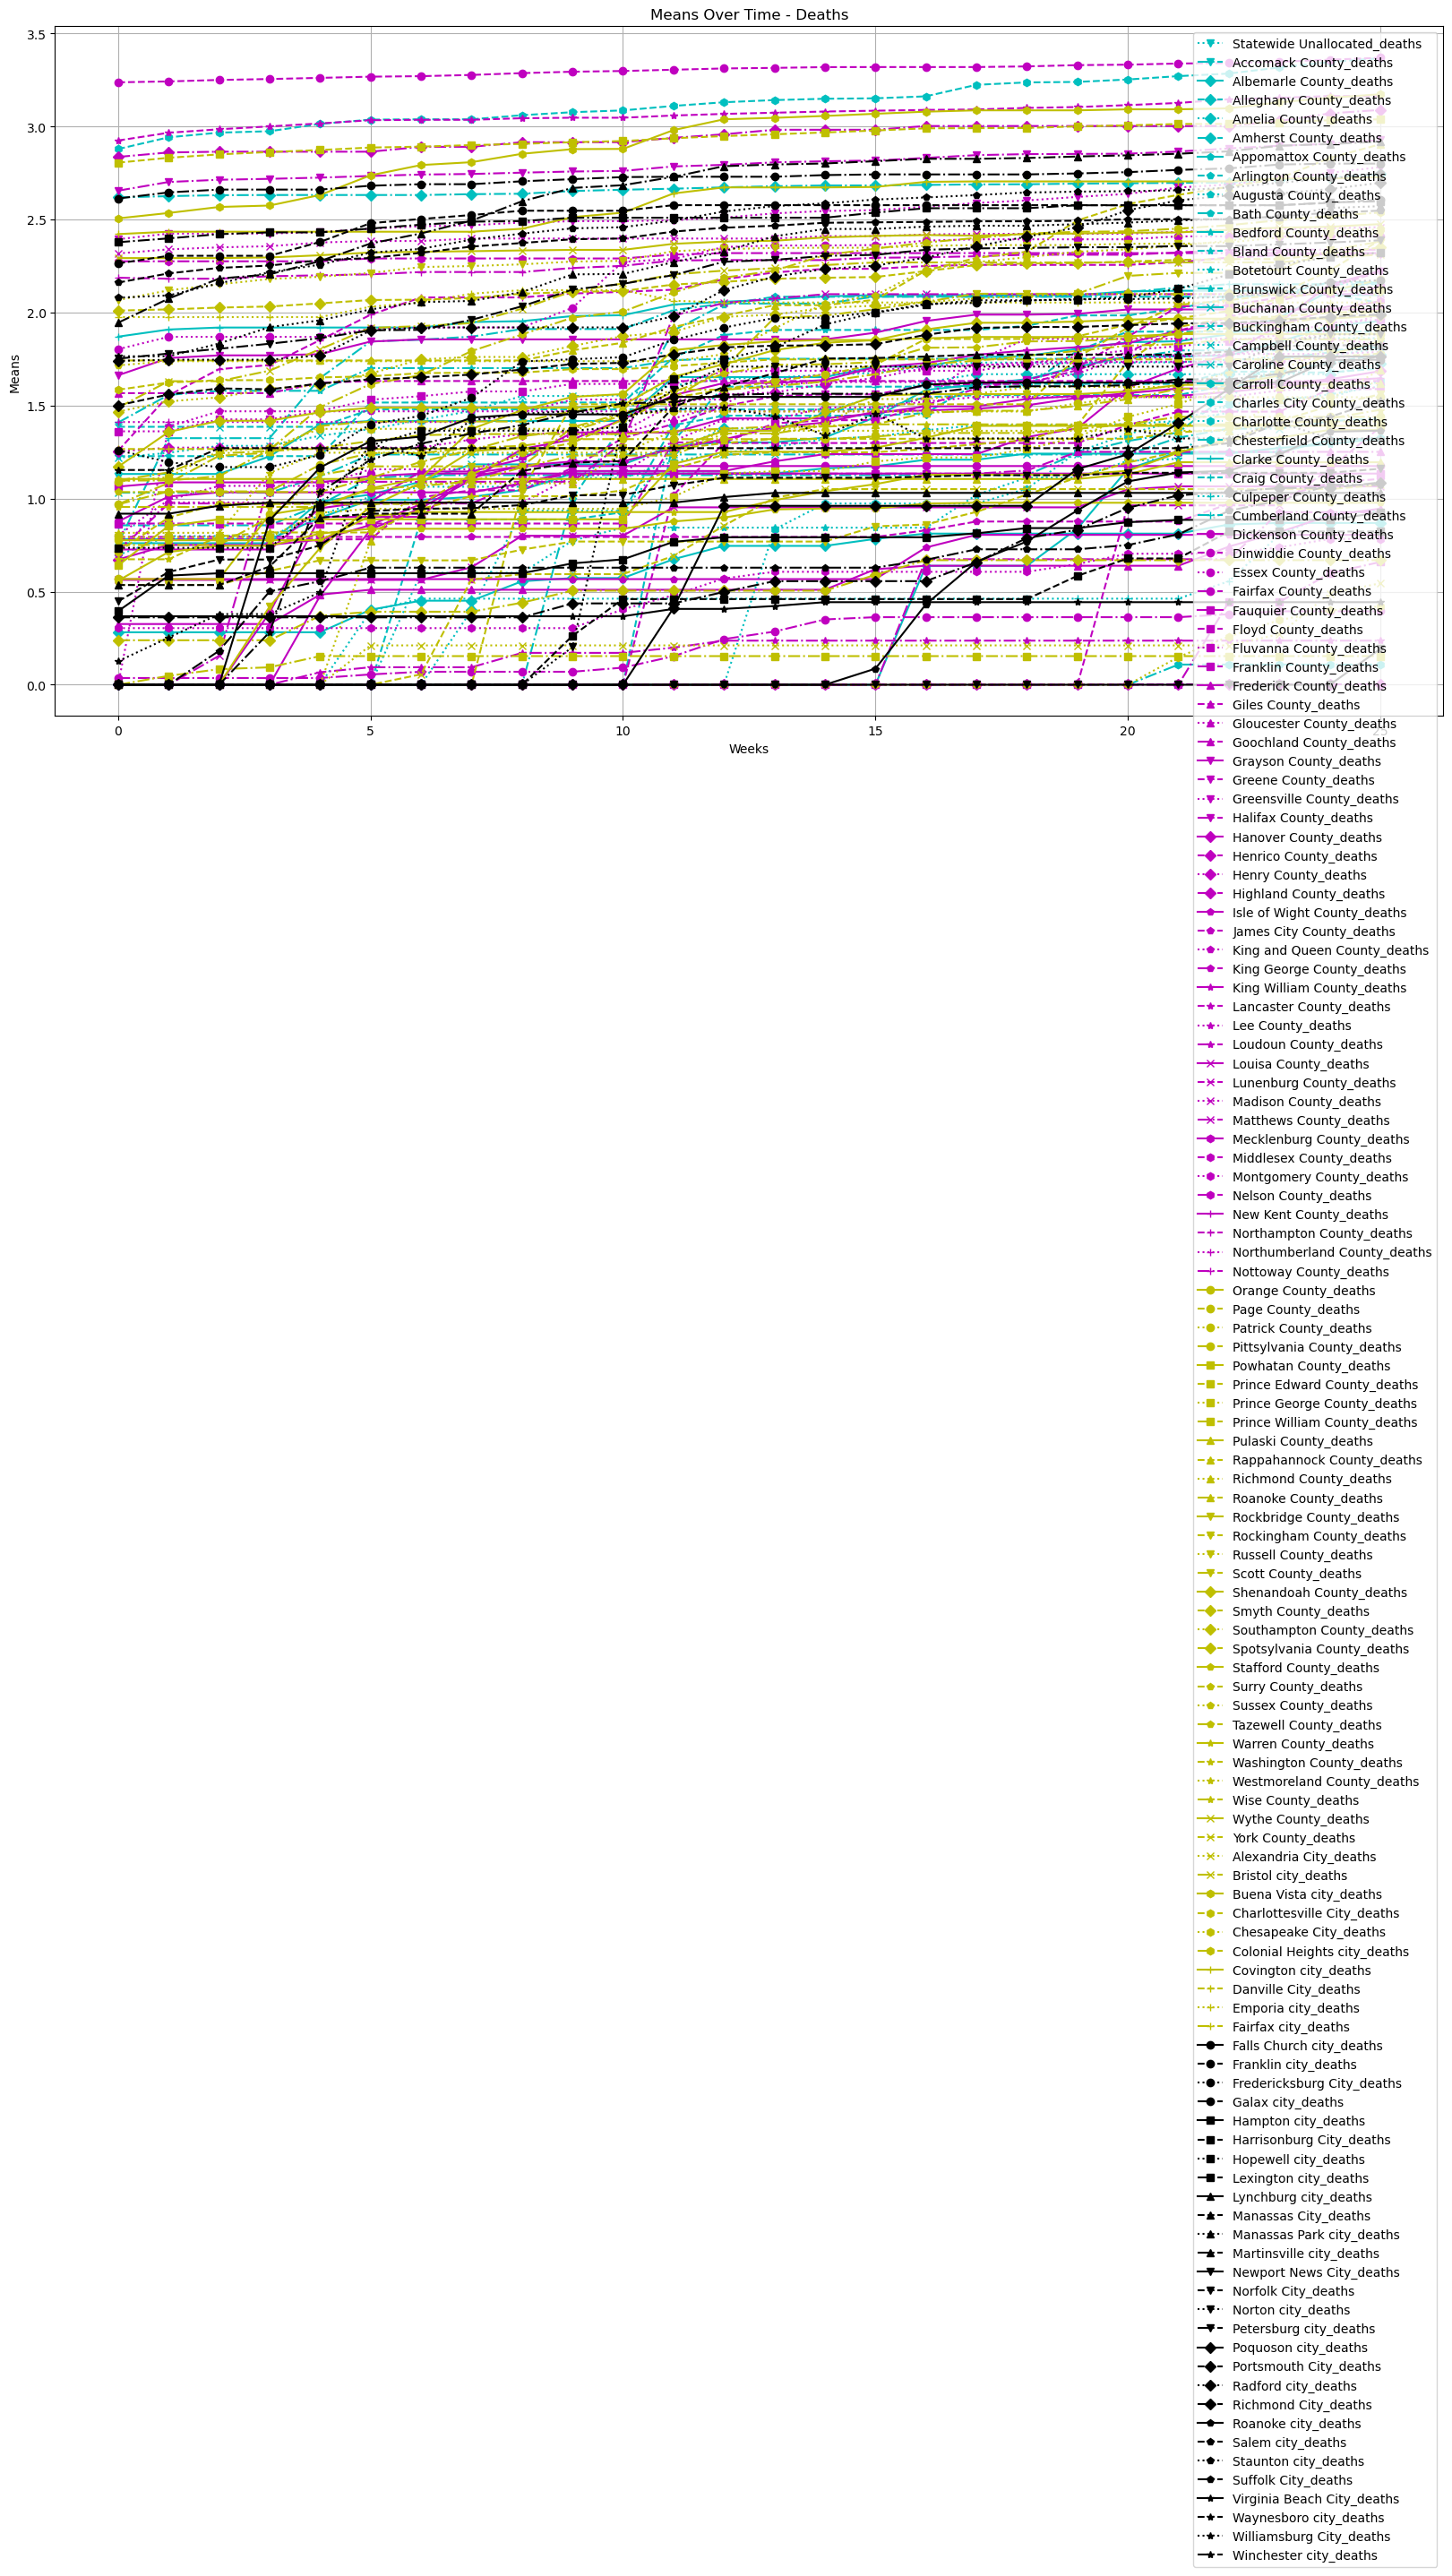

In [26]:
import itertools

# Initialize empty lists to store the means arrays
cases_means_arrays = []
deaths_means_arrays = []

# Define a list of colors and markers for lines
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'lime', 'pink', 'purple']
markers = ['o', 's', '^', 'v', 'D', 'p', '*', 'x', 'h', '+']
line_styles = ['-', '--', ':', '-.']

# Create an iterator for color, marker, and line style combinations.
# This is why we needed to import itertools, it will allow us to ensure we don't use the same permutation of 
# Color, line, and marker twice, so all of our lines are unique, and we'll have a lot of them.
color_marker_line_combinations = itertools.product(colors, markers, line_styles)

# Iterate through rows in the DataFrame
for index, row in df_va.iterrows():
    county_name = row['County Name']
    population = row['population']
    
    # Create arrays for cases and deaths based on column names
    cases_array = np.array([row[col] for col in df_va.columns if 'Cases' in col])
    deaths_array = np.array([row[col] for col in df_va.columns if 'Deaths' in col])
    
    # Dynamically name the arrays and int value
    cases_name = f"{county_name}_cases"
    deaths_name = f"{county_name}_deaths"
    pop_name = f"{county_name}_pop"
    
    # Apply normalize_and_log function
    cases_normalized = normalize_and_log(cases_array, population)
    deaths_normalized = normalize_and_log(deaths_array, population)
    
    # Apply calculate_statistics function
    cases_means, _, _ = calculate_statistics(cases_normalized)
    deaths_means, _, _ = calculate_statistics(deaths_normalized)
    
    # Append the means arrays to the lists
    cases_means_arrays.append((cases_name, cases_means))
    deaths_means_arrays.append((deaths_name, deaths_means))

# Create a single chart for all cases arrays with different colors, markers, and line styles
plt.figure(figsize=(20, 10))
for (name, means), (color, marker, line_style) in zip(cases_means_arrays, color_marker_line_combinations):
    plt.plot(means, label=name, color=color, marker=marker, linestyle=line_style)

plt.xlabel('Weeks')
plt.ylabel('Means')
plt.title('Means Over Time - Cases')
plt.legend()
plt.grid(True)
plt.show()

# Create a single chart for all deaths arrays with different colors, markers, and line styles
plt.figure(figsize=(20, 10))
for (name, means), (color, marker, line_style) in zip(deaths_means_arrays, color_marker_line_combinations):
    plt.plot(means, label=name, color=color, marker=marker, linestyle=line_style)

plt.xlabel('Weeks')
plt.ylabel('Means')
plt.title('Means Over Time - Deaths')
plt.legend()
plt.grid(True)
plt.show()


It's obviously a bit hard to read but the top 5 counties in both Cases and Deaths are: Dinwiddie County, Charles City County, Lancaster County, Buena Vista city, and Henry County.

# Plot weekly trends (cases and deaths) for the top 5 infected counties. Show plots by raw values and log normalized values. Describe what is causing them and what were the peaks. Do the counties follow state pattern.

Now that we know what counties are at the top, we can start splitting them into arrays and charting them.

In [27]:
def extract_county_data(dataframe, county_name):
    county_row = dataframe[dataframe['County Name'] == county_name]
    
    population = int(county_row['population'].values[0])

    cases_columns = [col for col in county_row.columns if 'Cases' in col]
    cases_data = county_row[cases_columns].values[0]

    deaths_columns = [col for col in county_row.columns if 'Deaths' in col]
    deaths_data = county_row[deaths_columns].values[0]
    
    # Make sure the data contains new deaths and cases, and removes the first element of the array (June 30th)
    cases_data = fix_data(calculate_differences((cases_data)))
    deaths_data = fix_data(calculate_differences((deaths_data)))
    
    return cases_data, deaths_data, population

dinwiddie_cases, dinwiddie_deaths, dinwiddie_pop = extract_county_data(df_va, "Dinwiddie County")
charles_cases, charles_deaths, charles_pop = extract_county_data(df_va, "Charles City County")
lancaster_cases, lancaster_deaths, lancaster_pop = extract_county_data(df_va, "Lancaster County")
bv_cases, bv_deaths, bv_pop = extract_county_data(df_va, "Buena Vista city")
henry_cases, henry_deaths, henry_pop = extract_county_data(df_va, "Henry County")

dinwiddie_cases_raw_means, dinwiddie_cases_raw_medians, dinwiddie_cases_raw_modes = calculate_statistics(dinwiddie_cases)
dinwiddie_deaths_raw_means, dinwiddie_deaths_raw_medians, dinwiddie_deaths_raw_modes = calculate_statistics(dinwiddie_deaths)
charles_cases_raw_means, charles_cases_raw_medians, charles_cases_raw_modes = calculate_statistics(charles_cases)
charles_deaths_raw_means, charles_deaths_raw_medians, charles_deaths_raw_modes = calculate_statistics(charles_deaths)
lancaster_cases_raw_means, lancaster_cases_raw_medians, lancaster_cases_raw_modes = calculate_statistics(lancaster_cases)
lancaster_deaths_raw_means, lancaster_deaths_raw_medians, lancaster_deaths_raw_modes = calculate_statistics(lancaster_deaths)
bv_cases_raw_means, bv_cases_raw_medians, bv_cases_raw_modes = calculate_statistics(bv_cases)
bv_deaths_raw_means, bv_deaths_raw_medians, bv_deaths_raw_modes = calculate_statistics(bv_deaths)
henry_cases_raw_means, henry_cases_raw_medians, henry_cases_raw_modes = calculate_statistics(henry_cases)
henry_deaths_raw_means, henry_deaths_raw_medians, henry_deaths_raw_modes = calculate_statistics(henry_deaths)

dinwiddie_cases_means, dinwiddie_cases_medians, dinwiddie_cases_modes = calculate_statistics(normalize_and_log(dinwiddie_cases, dinwiddie_pop))
dinwiddie_deaths_means, dinwiddie_deaths_medians, dinwiddie_deaths_modes = calculate_statistics(normalize_and_log(dinwiddie_deaths, dinwiddie_pop))
charles_cases_means, charles_cases_medians, charles_cases_modes = calculate_statistics(normalize_and_log(charles_cases, charles_pop))
charles_deaths_means, charles_deaths_medians, charles_deaths_modes = calculate_statistics(normalize_and_log(charles_deaths, charles_pop))
lancaster_cases_means, lancaster_cases_medians, lancaster_cases_modes = calculate_statistics(normalize_and_log(lancaster_cases, lancaster_pop))
lancaster_deaths_means, lancaster_deaths_medians, lancaster_deaths_modes = calculate_statistics(normalize_and_log(lancaster_deaths, lancaster_pop))
bv_cases_means, bv_cases_medians, bv_cases_modes = calculate_statistics(normalize_and_log(bv_cases, bv_pop))
bv_deaths_means, bv_deaths_medians, bv_deaths_modes = calculate_statistics(normalize_and_log(bv_deaths, bv_pop))
henry_cases_means, henry_cases_medians, henry_cases_modes = calculate_statistics(normalize_and_log(henry_cases, henry_pop))
henry_deaths_means, henry_deaths_medians, henry_deaths_modes = calculate_statistics(normalize_and_log(henry_deaths, henry_pop))

C:\Users\Billy\AppData\Local\Temp\ipykernel_21284\993933238.py:30: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(group_data)


In [28]:
def display_county_cases(case_means, title):
    x = np.arange(len(case_means))

    plt.plot(x, case_means, label='Mean', marker='.', linestyle='-', color='blue')

    
    plt.xlabel('Weeks')
    plt.ylabel('New Cases')
    plt.title(title)
    plt.legend()

    
    plt.grid(True)
    plt.show()
    
def display_county_deaths(deaths_means, title):
    x = np.arange(len(deaths_means))

    plt.plot(x, deaths_means, label='Mean', marker='.', linestyle='-', color='orange')

    # Add labels, title, and legend
    plt.xlabel('Weeks')
    plt.ylabel('New Deaths')
    plt.title(title)
    plt.legend()

    # Show the chart
    plt.grid(True)
    plt.show()
    
def calculate_differences(arr):
    # Calculate differences between each element and its previous element
    differences = np.diff(arr)
    return differences

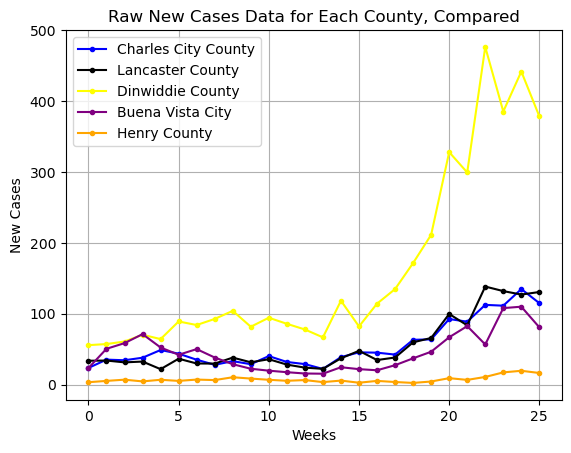

In [29]:
x = np.arange(len(charles_cases_raw_means))

plt.plot(x, charles_cases_raw_means, label='Charles City County', marker='.', linestyle='-', color='blue')
plt.plot(x, lancaster_cases_raw_means, label='Lancaster County', marker='.', linestyle='-', color='black')
plt.plot(x, dinwiddie_cases_raw_means, label='Dinwiddie County', marker='.', linestyle='-', color='yellow')
plt.plot(x, bv_cases_raw_means, label='Buena Vista City', marker='.', linestyle='-', color='purple')
plt.plot(x, henry_cases_raw_means, label='Henry County', marker='.', linestyle='-', color='orange')

    
plt.xlabel('Weeks')
plt.ylabel('New Cases')
plt.title('Raw New Cases Data for Each County, Compared')
plt.legend()

    
plt.grid(True)
plt.show()

You can see that, in terms of raw case data, Dinwiddie had the most, but the state's trend is still here. Recall that Virginia had a slight bump in case in the beginning, after which cases began moving toward their peak in around the 22nd week. This trend is present here, in a more exaggerated form by Dinwiddie County, but the trend is the same across all counties.

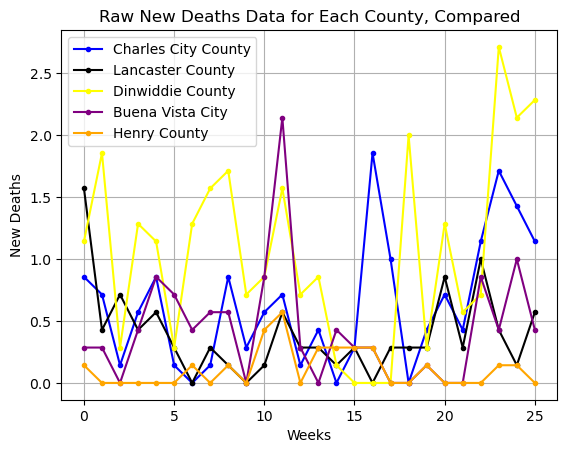

In [30]:
x = np.arange(len(charles_cases_raw_means))

plt.plot(x, charles_deaths_raw_means, label='Charles City County', marker='.', linestyle='-', color='blue')
plt.plot(x, lancaster_deaths_raw_means, label='Lancaster County', marker='.', linestyle='-', color='black')
plt.plot(x, dinwiddie_deaths_raw_means, label='Dinwiddie County', marker='.', linestyle='-', color='yellow')
plt.plot(x, bv_deaths_raw_means, label='Buena Vista City', marker='.', linestyle='-', color='purple')
plt.plot(x, henry_deaths_raw_means, label='Henry County', marker='.', linestyle='-', color='orange')

    
plt.xlabel('Weeks')
plt.ylabel('New Deaths')
plt.title('Raw New Deaths Data for Each County, Compared')
plt.legend()

    
plt.grid(True)
plt.show()

In terms of raw deaths, you can see that the values vary widely, but their structure remains the same as the state overall. There are wild shifts as the deaths oscillate between increasing and decreasing, but they eventually start rising as the 3rd big COVID outbreak hits around week 20.

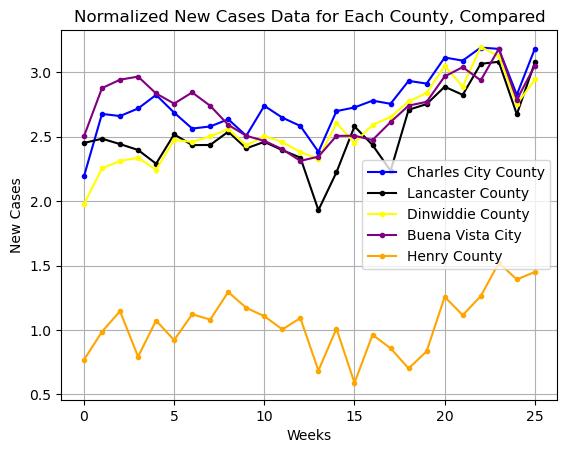

In [31]:
x = np.arange(len(charles_cases_means))

plt.plot(x, charles_cases_means, label='Charles City County', marker='.', linestyle='-', color='blue')
plt.plot(x, lancaster_cases_means, label='Lancaster County', marker='.', linestyle='-', color='black')
plt.plot(x, dinwiddie_cases_means, label='Dinwiddie County', marker='.', linestyle='-', color='yellow')
plt.plot(x, bv_cases_means, label='Buena Vista City', marker='.', linestyle='-', color='purple')
plt.plot(x, henry_cases_means, label='Henry County', marker='.', linestyle='-', color='orange')

    
plt.xlabel('Weeks')
plt.ylabel('New Cases')
plt.title('Normalized New Cases Data for Each County, Compared')
plt.legend()

    
plt.grid(True)
plt.show()

You can see that, when normalized for population, Dinwiddie follows four of the other 5 counties quite closely, with Henry remaining a bit distant still. It is even more clear, in this graph, how its peaks and valleys are similar to the evolution of the Cases in Virginia; that slight bump at week one, and an inexorable climb to a new peak at week 22.

What could be causing these peaks? As I speculated before, this may be the result of relaxing COVID restrictions around the beginning of July, compounded by people traveling for the holidays, which makes it easier to spread the disease.

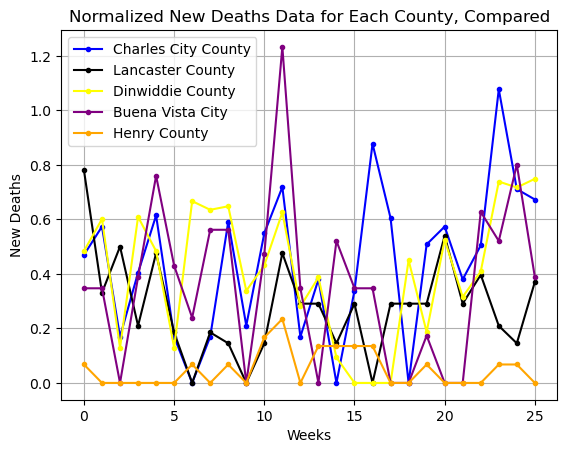

In [32]:
x = np.arange(len(charles_cases_means))

plt.plot(x, charles_deaths_means, label='Charles City County', marker='.', linestyle='-', color='blue')
plt.plot(x, lancaster_deaths_means, label='Lancaster County', marker='.', linestyle='-', color='black')
plt.plot(x, dinwiddie_deaths_means, label='Dinwiddie County', marker='.', linestyle='-', color='yellow')
plt.plot(x, bv_deaths_means, label='Buena Vista City', marker='.', linestyle='-', color='purple')
plt.plot(x, henry_deaths_means, label='Henry County', marker='.', linestyle='-', color='orange')

    
plt.xlabel('Weeks')
plt.ylabel('New Deaths')
plt.title('Normalized New Deaths Data for Each County, Compared')
plt.legend()

    
plt.grid(True)
plt.show()

Again, the deaths data varies wildly, the rate increasing and decreasing every couple of days. But here, you can still see those peaks I described in the overall state data: week 0, week 4, week 8, week 11, week 13, week 15, week 20, and week 24. 